<center> <h1>Trabajo Práctico 3</h1> </center>
<center> <h2>Caracterización fisicoquímica </h2> </center>

---
# Preparación del notebook

En la celda que se encuentra a continuación vamos a importar e instaar todas las librerías que se van a usar en este práctico.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "Ctrl + Enter"

👇

In [1]:
# Instalar las librerias
!pip install pandas rdkit tqdm useful_rdkit_utils seaborn scikit-posthocs chembl_downloader chembl_webresource_client xlsxwriter git+https://github.com/ikmckenz/adme-pred-py.git pubchempy

  Cloning https://github.com/ikmckenz/adme-pred-py.git to /tmp/pip-req-build-mng7guat
  Running command git clone --filter=blob:none --quiet https://github.com/ikmckenz/adme-pred-py.git /tmp/pip-req-build-mng7guat
  Resolved https://github.com/ikmckenz/adme-pred-py.git to commit 8091a02fe5998b8ba237760ade7ff3400abbbcdd
  Preparing metadata (setup.py) ... done


In [2]:
# Importar las librerias con las que vamos a trabajar en este práctico
# Importar libreria para guardar archivos
import os

# Importar libreria para guardar trabajar con tablas
import pandas as pd

# Importar las librerias de RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# Importar libreria de ChEMBL
from chembl_webresource_client.new_client import new_client

# Importar libreria de PubChem
import pubchempy as pcp

# Importar libreria de ADME
from adme_pred import ADME

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.


TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

---
# Parte 1: Cálculo de propiedades fisicoquímicas de una molécula

Para comenzar a trabajar vamos a generar una variable con la notación del compuesto. En este caso, vamos a usar la notación en smiles.

Luego vamos a usar la función llamada `Chem` de RDKit para generar la molécula.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "CTRL + Enter"

👇

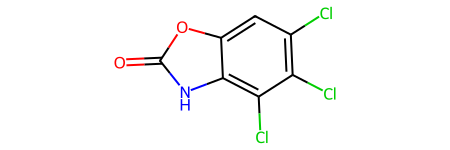

In [ ]:
# Crear una molécula a partir del SMILES proporcionado
smiles = 'C1=C2C(=C(C(=C1Cl)Cl)Cl)NC(=O)O2'
molecula = Chem.MolFromSmiles(smiles)
molecula

Ahora vamos a calcular los predictores nombrados en la [clase teórica 2](https://bioinformatica-iib.github.io/quimioinformatica/teoricas/2-Teorica-Dos/).

Para hacerlo, vamos a usar la función `Descriptors` y `Chem` de RDKit.

Esta función permite indicar que tipo de descriptor queremos calcular para una molécula.

Probemos calculando el peso molécular:

👇

In [ ]:
# Calcular el peso molecular exacto de la molécula
peso_molecular = Descriptors.ExactMolWt(molecula)

Podemos guardar el resultado de cada caraterística en una variable

👇

In [ ]:
# Calcular el peso molecular exacto de la molécula
molecular_weight = Descriptors.ExactMolWt(molecula)

# Calcular el logP (coeficiente de partición octanol-agua) de la molécula
logp = Descriptors.MolLogP(molecula)

# Calcular el número de donodores de enlaces de hidrógeno en la molécula
h_bond_donor = Descriptors.NumHDonors(molecula)

# Calcular el número de aceptores de enlaces de hidrógeno en la molécula
h_bond_acceptors = Descriptors.NumHAcceptors(molecula)

# Calcular el número de enlaces rotativos en la molécula
rotatable_bonds = Descriptors.NumRotatableBonds(molecula)

# Obtener el número total de átomos en la molécula
number_of_atoms = Chem.rdchem.Mol.GetNumAtoms(molecula)

# Calcular la refractividad molar de la molécula
molar_refractivity = Chem.Crippen.MolMR(molecula)

# Obtener el área superficial topológica mapeada de la molécula
topological_surface_area_mapping = Chem.QED.properties(molecula).PSA

# Obtener la carga formal de la molécula
formal_charge = Chem.rdmolops.GetFormalCharge(molecula)

# Obtener el número de átomos pesados en la molécula
heavy_atoms = Chem.rdchem.Mol.GetNumHeavyAtoms(molecula)

# Calcular el número de anillos en la molécula
num_of_rings = Chem.rdMolDescriptors.CalcNumRings(molecula)

Y podemos consultar la característica ejectuando el nombre de la variable

💭 ¿Cuál será el LogP de la molécula?

❗ Escribí el comando en la celda que se encuentra debajo

👇

💭 ¿Cuál será el Numero de H Donors de la molécula?

❗ Escribí el comando en la celda que se encuentra debajo

👇

💭 ¿Cuál será el Numero de H Acceptors de la molécula?

❗ Escribí el comando en la celda que se encuentra debajo

👇

### Actividad N°1 calculando propiedades fisicoquímicas de una molécula

💭 Calculá todas las propiedades de la molécula con PubChem CID 154575194

❗ Escribí el comando en la celda que se encuentra debajo

👇

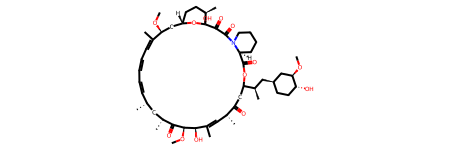

In [ ]:
# Importar libreria de PubChem
import pubchempy as pcp

# Busca un compuesto por su Compound ID (cid)
molecula_cid = pcp.get_compounds("154575194", 'cid')
smiles = molecula_cid[0].isomeric_smiles

# Crear una molécula a partir del SMILES proporcionado
molecula = Chem.MolFromSmiles(smiles)
molecula

A lo largo de la parte 1 de esta práctica vamos a estar trabajando con estás dos moléculas, la molécula con smiles ```'C1=C2C(=C(C(=C1Cl)Cl)Cl)NC(=O)O2'``` y la molécula con PubChem CID 154575194.

❗ Guardá las variables de cada molécula con nombres diferentes!

## Reglas de Lipinski

Christopher A. Lipinski hizo un análisis de las propiedades fisicoquímicas de los medicamentos disponibles en el mercado en el año 1997. A partir de los resultados que obtuvo, formuló una serie de reglas para predecir que tan adecuado podría ser un compuesto químico para ser administrado oralmente a un paciente.

1. No debe contener más de cinco dadores de puentes de hidrógeno
2. No debe contener más de diez aceptores de puentes de hidrógeno
3. Debe poseer un peso molecular máximo de 500 uma.
4. Debe poseer un coeficiente de reparto octanol-agua (log P) de 5 como máximo.

Como pueden ver, todas las reglan contienen el número 5 o son multiplos de ese número. Por ese motivo se las conocoe como <b>la regla de cinco de Lipinski</b>

Si te interesa este tema podés leer más acá [Lipinski (2004)](https://doi.org/10.1016/j.ddtec.2004.11.007)

### Actividad usando Reglas de Lipinski

💭 En base a los resultados obtenidos en la sección anterior, ¿Con cuantos
criterios de Lipinski cumplen las dos moléculas?

Podemos hacer comparaciones con cada característica evaluando las variable con el valor necesario para que cumpla con Lipinski.

Cuando el resultado arroje "True" quiere decir que el compuesto cumple con esa caracterísitca, si no lo hace indicará "False"

👇

In [ ]:
# Comprobar si el peso molecular es menor o igual a 500
print(molecular_weight <= 500)

# Comprobar si el logP es menor o igual a 5
print(logp <= 5)

# Comprobar si el número de donadores de enlaces de hidrógeno es menor o igual a 5
print(h_bond_donor <= 5)

# Comprobar si el número de aceptores de enlaces de hidrógeno es menor o igual a 10
print(h_bond_acceptors <= 10)

True
True
True
True


💭 ¿Qué significa este resultado?

Hacer la comparación para las dos moléculas

👇

---
##Regla de los 3

<b>La regla de cinco de Lipinski</b> fue optimizada para identificar compuestos que sean lead-like, esto quiere decir que tienen:

1. Características químicas simples, susceptibles de optimización química
2. Pertenencia a una serie SAR (Relación Estructura-Actividad) establecida
3. Situación favorable de la patente
4. Buenas propiedades de absorción, distribución, metabolismo y excreción (ADME)

Si te interesa este tema podés leer más aca: [Congreve et.al (2003)](https://pubmed.ncbi.nlm.nih.gov/11604031/)

La optimización establece que para que una molécula sea lead-like debe tener:

1. Coeficiente de partición octanol-agua log P no superior a 3
2. Masa molecular inferior a 300 daltons
3. No más de 3 donantes de enlaces de hidrógeno
4. No más de 3 aceptores de enlaces de hidrógeno
5. No más de 3 enlaces giratorios

Como pueden ver, todas las reglan contienen el número 3 o son multiplos de ese número. Por ese motivo se las conocoe como <b>la regla de los tres</b>


### Actividad usando Regla de los 3


💭 En base a los resultados obtenidos en la sección anterior, ¿Con cuantos criterios de ls regla de los 3 cumplen las dos moléculas?

👇

---
## Propiedades ADME

[SwissADME](http://www.swissadme.ch/) es una herramienta ampliamente utilizada en quimioinformática que permite predecir y evaluar propiedades y características de fármacos potenciales, como los que estamos usando en este práctico. Esta herramienta web que brinda acceso gratuito a un grupo de modelos predictivos para las propiedades fisicoquímicas, la farmacocinética, la semejanza con las drogas y la compatibilidad con la química médica.

La farmacocinética se divide principalmente en cuatro pasos:
*  **A**bsorción,
*  **D**istribución,
*  **M**etabolismo y
*  **E**xcreción

Estos se resumen como ADME. A menudo, ADME también incluye Toxicología y, por lo tanto, se denomina ADMET o ADMETox.

Absorción: La cantidad y el tiempo de absorción del fármaco en el cuerpo depende de múltiples factores que pueden variar entre los individuos y sus condiciones, así como de las propiedades de la sustancia. Factores como la (poca) solubilidad de los compuestos, el tiempo de vaciado gástrico, el tiempo de tránsito intestinal, la (in)estabilidad química en el estómago y la (in)capacidad para penetrar la pared intestinal pueden influir en la medida en que se absorbe un fármaco después de p.ej. administración oral, inhalación o contacto con la piel.

Distribución: La distribución de una sustancia absorbida, es decir, dentro del cuerpo, entre la sangre y diferentes tejidos, y cruzando la barrera hematoencefálica se ven afectados por las tasas de flujo sanguíneo regional, el tamaño molecular y la polaridad del compuesto, y la unión a las proteínas séricas y al transportador. enzimas Los efectos críticos en toxicología pueden ser la acumulación de sustancias altamente apolares en el tejido graso o el cruce de la barrera hematoencefálica.

Metabolismo: Después de ingresar al cuerpo, el compuesto será metabolizado. Esto significa que solo una parte de este compuesto alcanzará realmente su objetivo. Principalmente, las enzimas hepáticas y renales son responsables de la descomposición de los xenobióticos (sustancias que son extrínsecas al cuerpo).

Excreción: los compuestos y sus metabolitos deben eliminarse del cuerpo a través de la excreción, generalmente a través de los riñones (orina) o en las heces. La excreción incompleta puede provocar la acumulación de sustancias extrañas o una interferencia adversa con el metabolismo normal.

### Actividad con SwissADME
1.  Entrá a la página web de [SwissADME](http://www.swissadme.ch/)
2.  Ingresá la molécula ```"C1=C2C(=C(C(=C1Cl)Cl)Cl)NC(=O)O2"```

¿Podés encontrar el criterio de Lipinsky, algún criterio de Leadlikeness y el valor de absorción gastrointestinal?

También existen herramientas informáticas para analizar las propiedades ADME:

In [ ]:
# Creamos una instancia del objeto ADME y pasamos la molécula como argumento
mol = ADME("C1=C2C(=C(C(=C1Cl)Cl)Cl)NC(=O)O2")

# Imprimimos la representación de la molécula
mol

### PAINS

Los PAINS (Pan Assay Interference Structure), o compuestos de interferencia pan-ensayo, son una fuente importante de falsos positivos en el proceso de descubrimiento de fármacos. Los PAINS son compuestos activos que se hacen pasar por posibles candidatos a fármacos pero son promiscuos con múltiples comportamientos que interfieren con las lecturas del ensayo.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/PAINS_Figure.tif/lossy-page1-800px-PAINS_Figure.tif.jpg" width="500" />



Usando ADME podemos determinar si la molécula tiene PAINS

In [ ]:
mol.pains()

True

Evaluá el PAINS de esta molécula: `C1C(=O)NC(=S)S1`



### Brenk

El filtro de alertas estructurales de Brenk encuentra fragmentos "*supuestamente tóxicos, químicamente reactivos, metabólicamente inestables o con propiedades que generan una mala farmacocinética*"

In [ ]:
mol = ADME("C1C(=O)NC(=S)S1")
mol.brenk()

True

Por último, podemos imprimir el reporte completo

In [ ]:
# full report

mol.full_report()

Pharmacokinetics:
GI absorption: High
BBB permeant: Yes


Lipinski Rule of 5 Violations:
No violations found


Medicinal Chemistry:
PAINS filter: False
Brenk filter: True


### Actividad N°2 calculando propiedades fisicoquímicas de una molécula
Compará las propiedades de Lipinsky, Regla de los 3 y ADME de ```'C1=C2C(=C(C(=C1Cl)Cl)Cl)NC(=O)O2'```, ````C1C(=O)NC(=S)S1```` con PubChem CID 154575194

💭¿Cuál de estas moléculas elegirías como mejor candidato para desarrollar una nueva droga?

❗ Escribí el comando en la celda que se encuentra debajo

---
# Parte 2: Cálculo de propiedades fisicoquímicas de una bibliotecas químicas

Para trabajar con bibliotecas químicas vamos a usar los datos obtenidos del ejercicio integrador N°2 de la práctica anterior

1.  Ingresá al BioEnsayo ID CHEMBL674637 de ChEMBL
2.  Explicar en que consiste el ensayo
3.  Descargá la información del ensayo usando

```
new_client.activity.filter(assay_chembl_id=assay_chembl_id)
```


4.  Guardá los datos del ensayo en una variable
5.  Obtené una lista de los compuestos ensayados
5.  Armá una tabla con los compuestos ensayados usando Pandas
6.  Convertí todas las moléculas usando RDKit
7.  Identificá al menos tres subestructuras conservadas entre los datos
8.  Guardá las moléculas con cada subestructura en una tabla diferente
9.  Descargá los datos en tres archivos .csv


Si tienen resuelto el ejercicio pueden usar su propio código. En el caso de que aún no lo hayan resuelto, a continuación les dejamos los comandos necesarios para la obtención de los datos:

,smiles,ROMol
0,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,
1,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,
2,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)N(C)c2...,
3,CCN(CC)CC(O)CNC(=O)c1cc(C)c(/C=C2\C(=O)Nc3ncnc...,
4,O=C1Nc2ncnc(Nc3ccc(F)c(Cl)c3)c2/C1=C/c1ccc(C(=...,
5,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,
6,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ncnc(...,
7,Cc1cc(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)...,
8,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,
9,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,

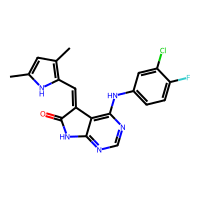
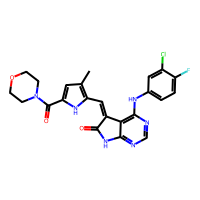
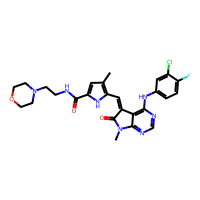
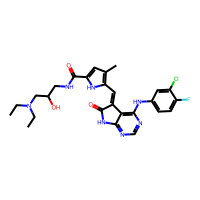
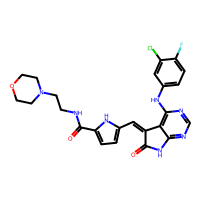
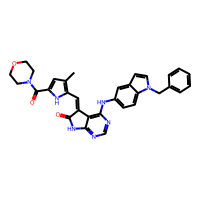
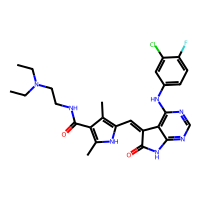
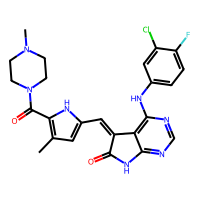
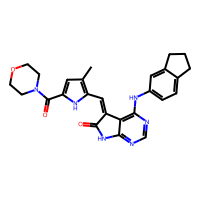
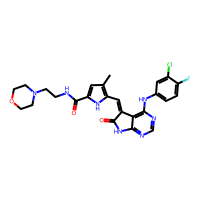
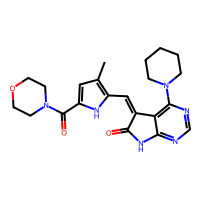
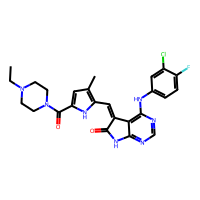
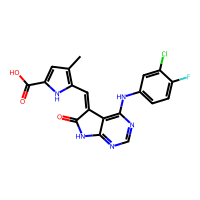
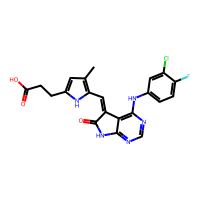
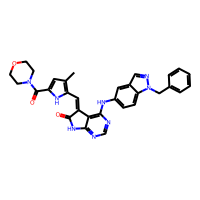
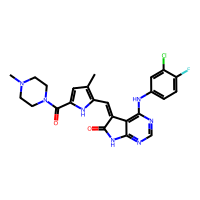
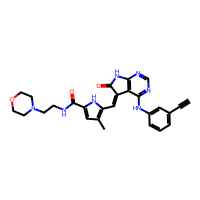
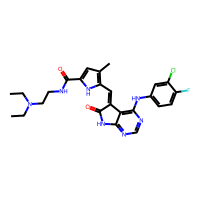
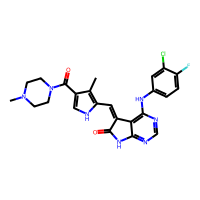
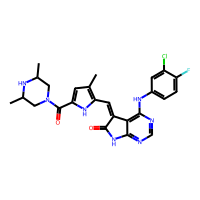
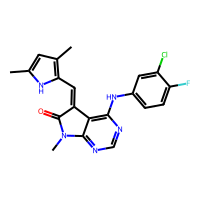
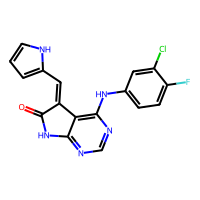
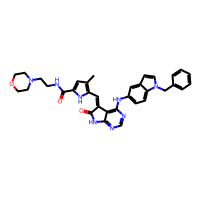
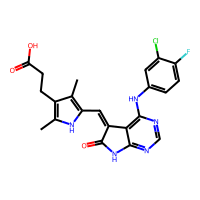
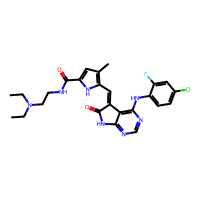

In [3]:
#Recolectar los datos del ensayo
assay_chembl_id = "CHEMBL674637"
data = new_client.activity.filter(assay_chembl_id=assay_chembl_id)

#Armar una tabla con los datos
data_frame = pd.DataFrame.from_dict(data)

#Seleccionar la columna de los smiles
smiles = data_frame['canonical_smiles']

#Generar una tabla que contenga los smiles del ensayo
tabla_CHEMBL674637 = pd.DataFrame()
tabla_CHEMBL674637['smiles'] = smiles

#Agregar el formato molécula de RDKit para cada smiles
PandasTools.AddMoleculeColumnToFrame(tabla_CHEMBL674637, smilesCol='smiles')

#Mostrar la tabla
tabla_CHEMBL674637

Si bien se puede definir todos los parámetros que definimos en la parte 1 para cada molécula, eso llevaría mucho tiempo y líneas de código.

Por ese motivo, vamos a definir una función para calcular las propiedades fisicoquímicas de cada una de las moléculas y que me devuelva los resultados en una tabla. Esta función, a diferencia de las que venimos usando, no está definida por default, si no que, la vamos a crear usando `def`.

❗ No es uno de los objetivos de este curso que sepan definir funciones. La dejamos definida para usarla durante las próximas actividades.

👇

In [4]:
def drug_likness_decriptors(df):
    # Desactivar las advertencias de asignación encadenada en pandas
    pd.options.mode.chained_assignment = None

    # Crear listas vacías para almacenar los descriptores
    NumHDonors_list = []
    NumHAcceptors_list = []
    MW_list = []
    LogP_list = []
    rotatable_bonds_list = []

    # Calcular los descriptores para cada molécula en la columna 'ROMol'
    for element in df['ROMol']:
        try:
            # Calcular el número de donadores de enlaces de hidrógeno
            NumHDonors = Descriptors.NumHDonors(element)
            NumHDonors_list.append(NumHDonors)
        except:
            NumHDonors_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el número de aceptores de enlaces de hidrógeno
            NumHAcceptors = Descriptors.NumHAcceptors(element)
            NumHAcceptors_list.append(NumHAcceptors)
        except:
            NumHAcceptors_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el peso molecular exacto
            MW = Descriptors.ExactMolWt(element)
            MW_list.append(MW)
        except:
            MW_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el logP
            LogP = Descriptors.MolLogP(element)
            LogP_list.append(LogP)
        except:
            LogP_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el número de enlaces rotativos
            rotatable_bonds = Descriptors.NumRotatableBonds(element)
            rotatable_bonds_list.append(rotatable_bonds)
        except:
            rotatable_bonds_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

    # Agregar las listas de descriptores al DataFrame
    df['HBD'] = NumHDonors_list
    df['HBA'] = NumHAcceptors_list
    df['MW'] = MW_list
    df['logP'] = LogP_list
    df['nRotB'] = rotatable_bonds_list

    return df

In [5]:
# Llamar a la función drug_likness_decriptors pasando el DataFrame tabla_CHEMBL674637 como argumento
tabla_CHEMBL674637 = drug_likness_decriptors(tabla_CHEMBL674637)

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

---
## Visualización de la distribución de las propiedades fisicoquímicas

La tabla contiene mucha información y resulta dificil sacar conclusiones a partir de los datos. Por eso, vamos a graficar las propiedades fisicoquímicas que calculamos para tener un panorama más claro.

Existen dos librerías para graficar en python:
- Matplotlib (https://matplotlib.org/)
- Seaborn https://seaborn.pydata.org/

¡Vamos a probar como se ve el grafico de tipo hisograma en ambas!

---

### Matplotlib


Si quieren leer más al respecto de histogramas en Matplotlib pueden ingresar al siguiente link:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Empecemos por el comando básico

👇

<Axes: ylabel='Frequency'>

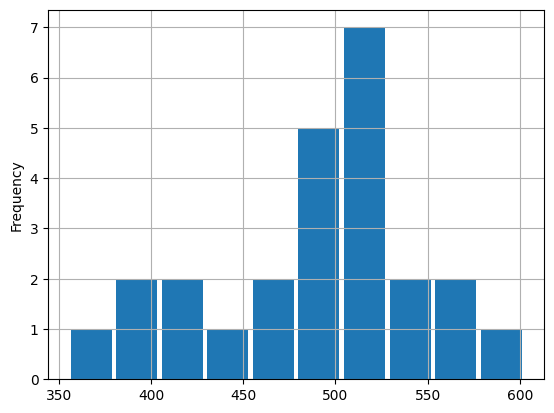

In [ ]:
# Crear un histograma de la columna 'MW' de la tabla_CHEMBL674637 utilizando el método plot.hist()
tabla_CHEMBL674637['MW'].plot.hist(grid=True, bins=10, rwidth=0.9)

💭 ¿Que es el eje x? ¿Que es el eje y?

Este gráfico se puede mejorar agregando algunas lineas de código

👇

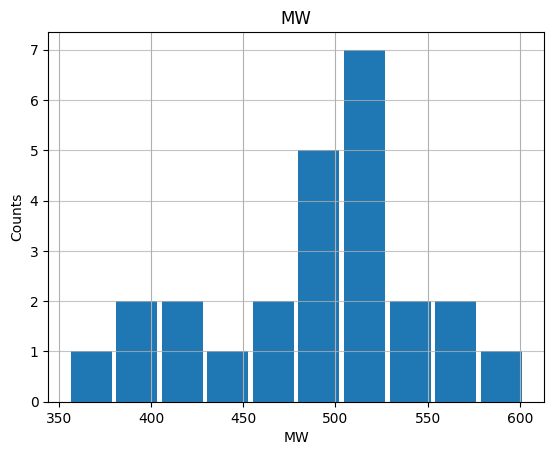

In [ ]:
# Crear un histograma de la columna 'MW' de la tabla_CHEMBL674637 utilizando el método plot.hist()
tabla_CHEMBL674637['MW'].plot.hist(grid=True, bins=10, rwidth=0.9)

# Establecer el título del gráfico como 'MW'
plt.title('MW')

# Establecer la etiqueta del eje x como 'MW'
plt.xlabel('MW')

# Establecer la etiqueta del eje y como 'Counts'
plt.ylabel('Counts')

# Activar la cuadrícula en el eje y con un nivel de transparencia de 0.75
plt.grid(axis='y', alpha=0.75)
plt.rcParams['axes.axisbelow']=True

💭 ¿Podés hacer el histograma del LogP?

❗ Escribí el comando en la celda que se encuentra debajo

👇

Modificando un poco el código anterior podemos graficar todos los descriptores

👇

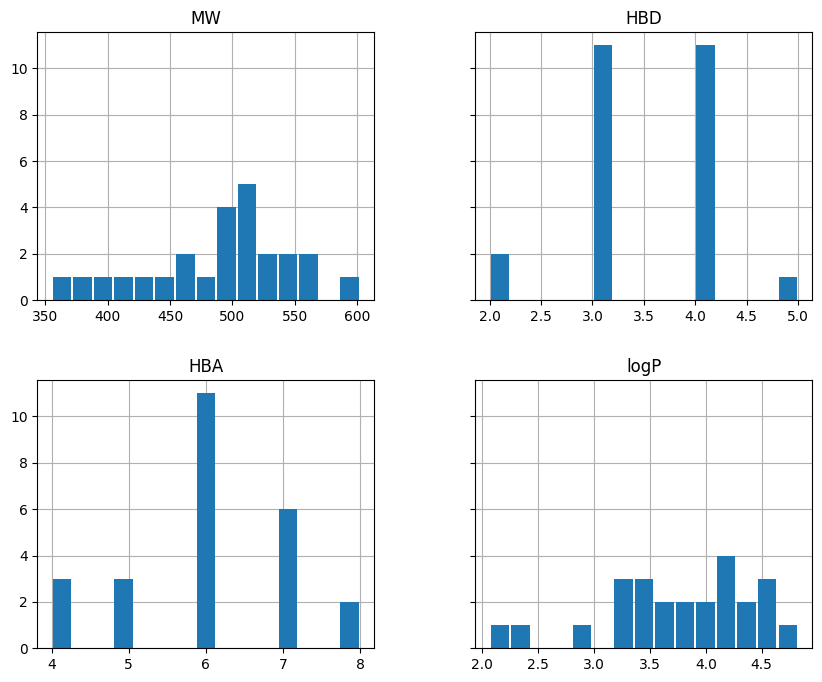

In [ ]:
# Crear un histograma de las columnas 'MW', 'HBD', 'HBA' y 'logP' de la tabla_CHEMBL674637
tabla_CHEMBL674637[['MW', 'HBD', 'HBA', 'logP']].hist(
    bins=15,
    figsize=(10, 8),
    rwidth=0.9,
    sharey=True
)
plt.rcParams['axes.axisbelow']=True

# Guardar el gráfico como un archivo JPG
plt.savefig("plt_histogramas.jpg")

# Mostrar el gráfico en la salida
plt.show()


---

### Seaborn

Si quieren leer más al respecto de histogramas en Seaborn pueden ingresar al siguiente link:
https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

Empecemos por el comando básico

👇

<Axes: xlabel='MW', ylabel='Count'>

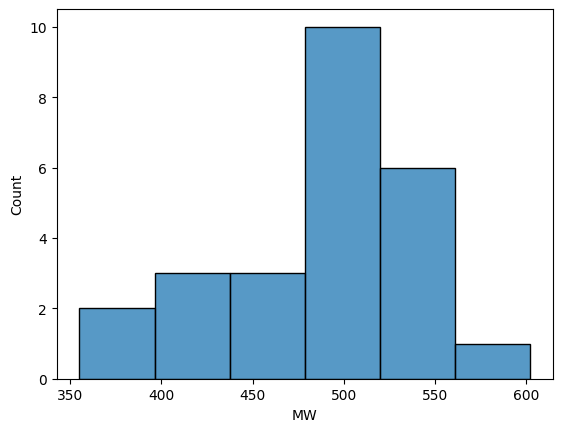

In [ ]:
# Crear un histograma de la columna 'MW' de la tabla_CHEMBL674637
sns.histplot(tabla_CHEMBL674637['MW'])

💭 ¿Podés hacer el histograma del LogP?

❗ Escribí el comando en la celda que se encuentra debajo

👇

Modificando un poco el código anterior podemos graficar todos los descriptores

👇

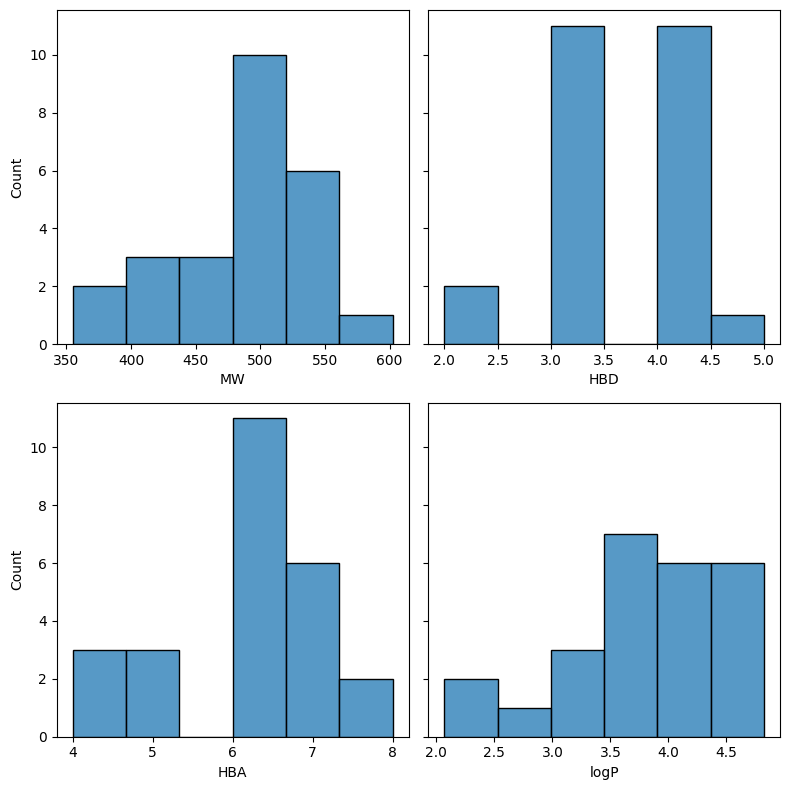

In [ ]:
# Crear una figura con un arreglo de subplots de 2 filas y 2 columnas, con un tamaño de 8x8 pulgadas
# Definir los anchos deseados para cada subplot
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# Crear un histograma de la columna 'MW' de la tabla_CHEMBL674637 y asignarlo al subplot en la posición [0, 0]
sns.histplot(tabla_CHEMBL674637['MW'], ax=axs[0, 0])

# Crear un histograma de la columna 'HBD' de la tabla_CHEMBL674637 y asignarlo al subplot en la posición [0, 1]
sns.histplot(tabla_CHEMBL674637['HBD'], ax=axs[0, 1])

# Crear un histograma de la columna 'HBA' de la tabla_CHEMBL674637 y asignarlo al subplot en la posición [1, 0]
sns.histplot(tabla_CHEMBL674637['HBA'], ax=axs[1, 0])

# Crear un histograma de la columna 'logP' de la tabla_CHEMBL674637 y asignarlo al subplot en la posición [1, 1]
sns.histplot(tabla_CHEMBL674637['logP'], ax=axs[1, 1])

# Ajustar el diseño de los subplots para evitar superposiciones
fig.tight_layout()

# Guardar la figura como un archivo PNG
plt.savefig('sns_histogramas.png')

---
### Actividad N°1 calculando propiedades fisicoquímicas de bibliotecas químicas
Ahora vamos a trabajar con moléculas aprobadas por la FDA:


En esta sección vamos a trabajar con datos en formato .csv

Los datos los pueden descargar accediendo a este [link](https://drive.google.com/file/d/1aNVcaBXQHFQIM63YU-ou4f_7drdoy04J/view?usp=drive_link)

Tienen que descargar la tabla y luego guardarla en la misma carpeta de Google Drive en la que guardan las copias de las Notebooks del curso.

Luego, vamos a cargar el contenido de drive para poder guardar los archivos generados en este práctico. Este proceso tarda unos minutos y para completarlo debes seguir los siguientes pasos:

Ejecutar la celda que se encuentra debajo
Vas a obtener un cartel que dice "¿Permitir que este cuaderno acceda a tus archivos de Google Drive?"
Apretar "Conectar con Google Drive".
Te va a pedir "Google Drive for desktop quiere acceder a tu cuenta de Google" y tenés que apretar en "permitir".
Esperar unos minutos para que se cargue el contenido de Drive

Listo!🎉

In [ ]:
# Cargar el contenido de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A continuación vamos a cargar una tabla con moléculas aprobadas por la FDA. La tabla que les pasamos la tienen que guardar en su drive. El comando que encontrarás a continuación es de la dirección estándar para trabajar en este curso, pero podés modificarla en función de como tengas organizado tu drive.

Si necesitas ayuda para encontrar la carpeta en la que guardaste la tabla podés usar la sección de "Archivo" que se encuentra a la izquierda de la Notebook

In [ ]:
# Indicar la carpeta de trabajo
path = '/content/drive/MyDrive/Curso_quimioinformatica'
os.chdir(path)

,Unnamed: 0.1,Unnamed: 0,SMILES,ROMol
0,0,0,CCCCCCc(ccc(O)c1)c1O,
1,1,1,CC(C)([C@H]1C([O-])=O)S[C@@H]([C@H]2/N=C/N3CCC...,
2,2,2,NCCc1ccn[nH]1,
3,3,3,C[C@@H](C[C@@H](C)[C@H]([C@@H](C)/C=C\C=C/C=C\...,
4,4,4,C[C@H]([C@@H](C(NCC(N[C@@H](Cc1c[nH]c2c1cccc2)...,
...,...,...,...,...
1665,1665,1665,O=C(c(cc1)ccc1NS(c1cccc2cccnc12)(=O)=O)N1CCN(C...,
1666,1666,1666,OC(Cn1nnnc1)(C(c(cc1)ncc1-c(cc1)ccc1OCC(F)(F)F...,
1667,1667,1667,C(COc(cc1)c(COC/C=C/COCc2cc3ccc2)cc1/N=C1/N=CC...,
1668,1668,1668,CC(C)c(c(O)cc(/C=C/c1ccccc1)c1)c1O,

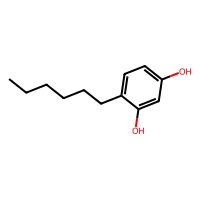
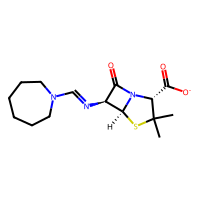
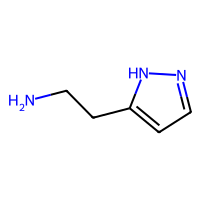
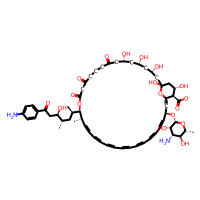
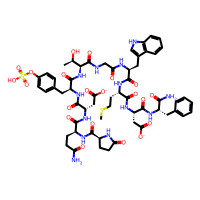
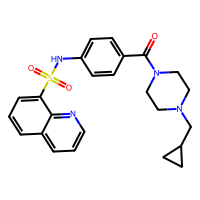
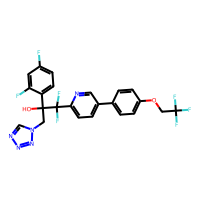
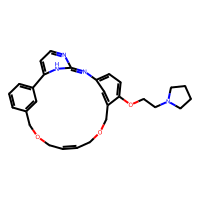
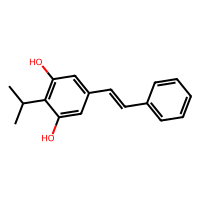
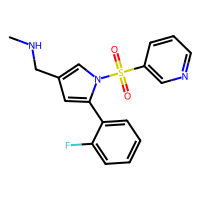

In [ ]:
#Generar una variable con el nombre de la tabla que contiene moléculas aprobadas por la FDA
moleculas_aprobadas_por_FDA = pd.read_csv('FDA_Drugs.csv')

#Agregar el formato molécula de RDKit para cada smiles
PandasTools.AddMoleculeColumnToFrame(moleculas_aprobadas_por_FDA, smilesCol='SMILES')

#Mostrar la tabla
moleculas_aprobadas_por_FDA

1.   Calcular las propiedades fisicoquímicas de todas las moléculas de la tabla
2.   Graficar la distribución de las propiedades usando Matplotlib o Seaborn

💭 ¿Cómo es la distribución en comparación con las moléculas del BioEnsayo ID CHEMBL674637 de ChEMBL?

❗ Escribí los comando para resolver la actividad en la celda que se encuentra debajo

👇

---

## Filtrar por características compatibles con las reglas de Lipinski

Vamos a generar una columna vacía para poder volcar los datos necesarios para seleccionar los compuestos que son compatibles con las reglas de Lipinski

👇

In [ ]:
# Agregar una nueva columna llamada 'lipinski' al DataFrame tabla_CHEMBL674637 y asignarle un valor inicial de 0
tabla_CHEMBL674637['lipinski'] = 0

Ahora vamos a recorrer todos los compuestos de la tabla para identificar cuales cumplen con las reglas. En el caso de que ese compuesto cumpla, se agregará un 1 a la columna que creamos.

👇

In [ ]:
# Recorrer el DataFrame tabla_CHEMBL674637 utilizando un bucle for y el índice i
for i in range(len(tabla_CHEMBL674637)):
    # Comprobar las condiciones para cumplir con la regla de Lipinski y actualizar la columna 'lipinski' en la fila correspondiente
    if tabla_CHEMBL674637['MW'][i] <= 500 and tabla_CHEMBL674637['logP'][i] <= 5 and tabla_CHEMBL674637['HBD'][i] <= 5 and tabla_CHEMBL674637['HBA'][i] <= 10:
        tabla_CHEMBL674637['lipinski'][i] = True
    else:
      tabla_CHEMBL674637['lipinski'][i] = False

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

,smiles,ROMol,HBD,HBA,MW,logP,nRotB,lipinski
0,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,,3,4,383.094916,4.45034,3,True
1,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,,3,6,482.126944,3.61432,4,True
2,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)N(C)c2...,,3,7,539.184794,3.22822,7,False
3,CCN(CC)CC(O)CNC(=O)c1cc(C)c(/C=C2\C(=O)Nc3ncnc...,,5,7,541.200444,3.57442,10,False
4,O=C1Nc2ncnc(Nc3ccc(F)c(Cl)c3)c2/C1=C/c1ccc(C(=...,,4,7,511.153493,2.89550,7,False
5,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,,3,7,559.233188,4.82482,6,False
6,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ncnc(...,,4,6,525.205529,4.52194,9,False
7,Cc1cc(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)...,,3,6,495.158579,3.52952,4,True
8,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,,3,6,470.206639,3.31052,4,True
9,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,,4,7,525.169144,3.20392,7,False

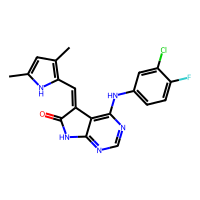
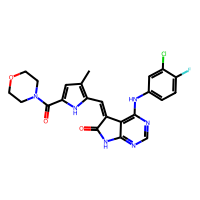
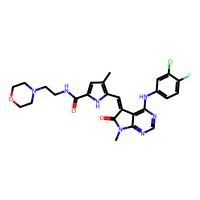
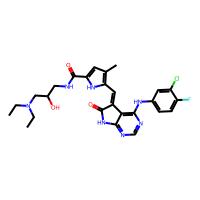
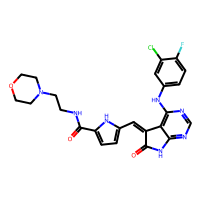
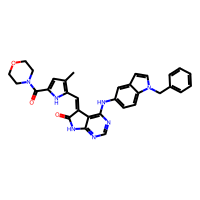
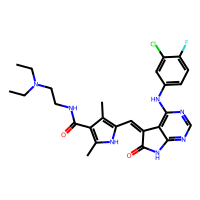
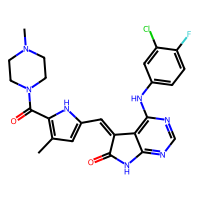
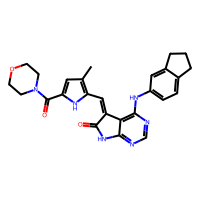
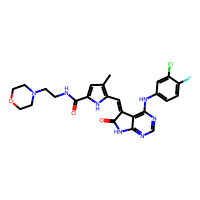
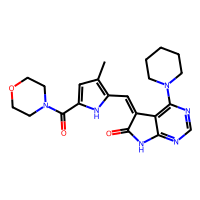
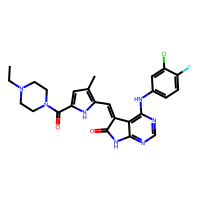
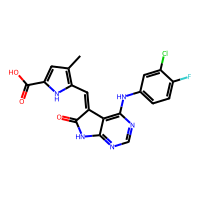
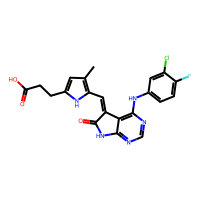
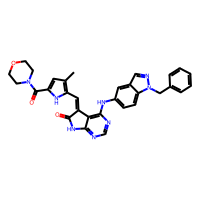
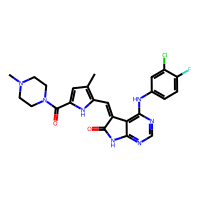
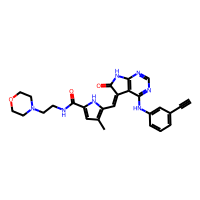
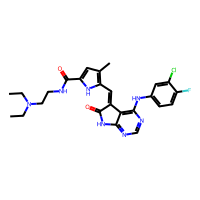
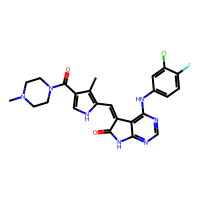
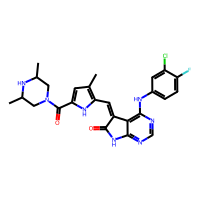
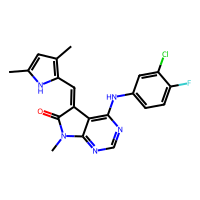
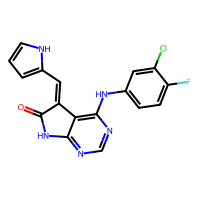
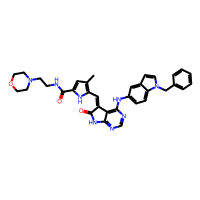
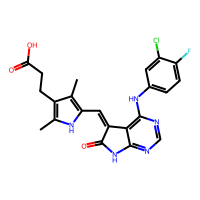
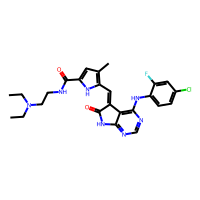

In [ ]:
tabla_CHEMBL674637

Ahora vamos a seleccionar todas las filas correspondientes a compuestos que cumplen con las reglas de Lipinski

👇

In [ ]:
tabla_CHEMBL674637_druglike = (tabla_CHEMBL674637[(tabla_CHEMBL674637.lipinski==True)])
tabla_CHEMBL674637_druglike = tabla_CHEMBL674637_druglike.reset_index()

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

Podemos usar un comando el siguiente comando para dibujar todas las moléculas de la tabla

👇

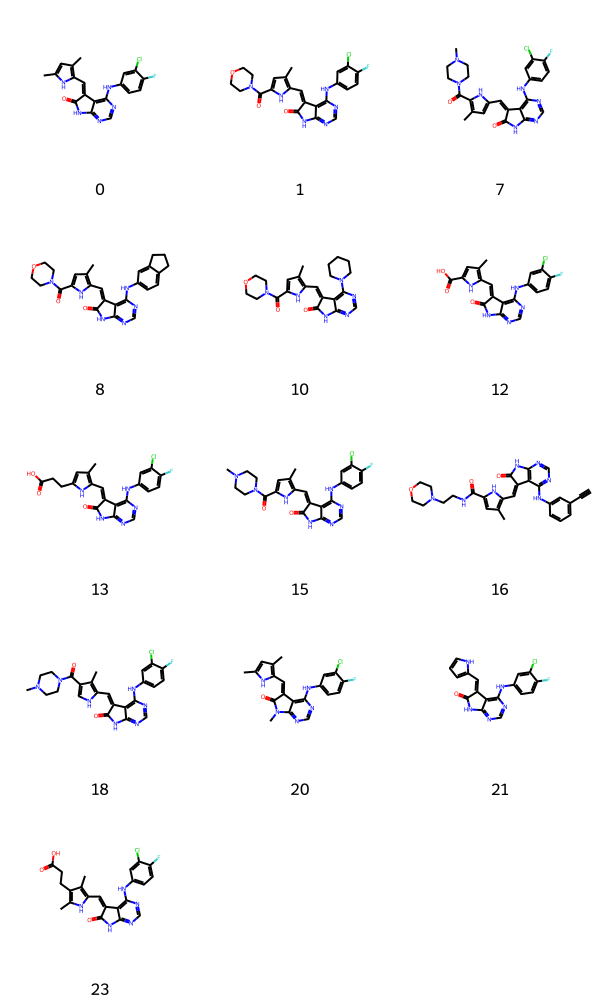

In [ ]:
Chem.Draw.MolsToGridImage(tabla_CHEMBL674637_druglike['ROMol'], legends = [(str(tabla_CHEMBL674637_druglike['index'][i])) for i in range(len(tabla_CHEMBL674637_druglike))])

Vamos a ver como quedaron los histogramas de la nueva tabla

👇

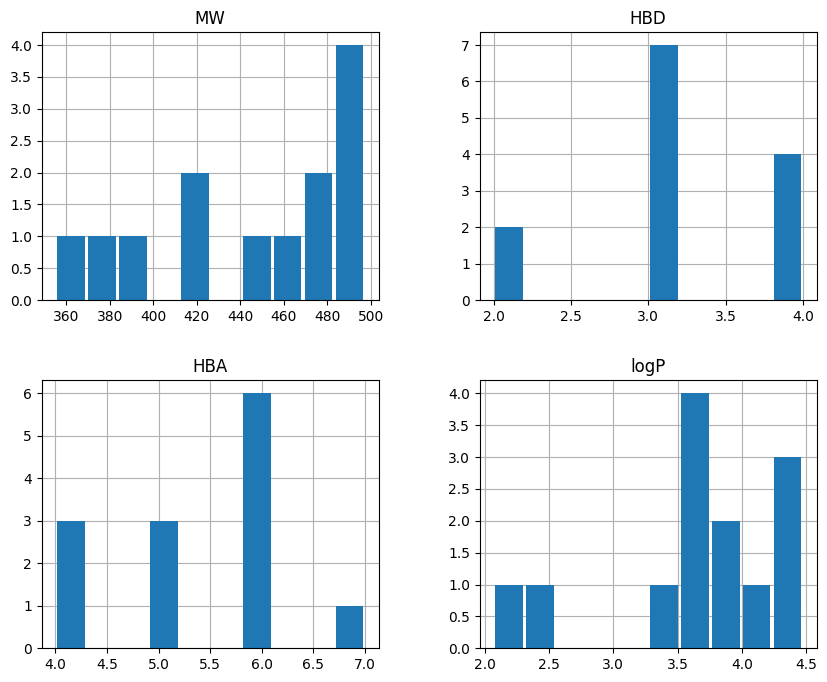

In [ ]:
tabla_CHEMBL674637_druglike[['MW', 'HBD', 'HBA', 'logP']].hist(
    figsize=(10, 8),
    rwidth = 0.9,
)

plt.rcParams['axes.axisbelow']=True
plt.show()

Para ver como cambió la distriución de propiedades, vamos a dibujar una carácteristica a la vez, comparando la tabla completa de compuestos con la tabla de compuestos seleccionados.

👇

<Axes: xlabel='MW', ylabel='Count'>

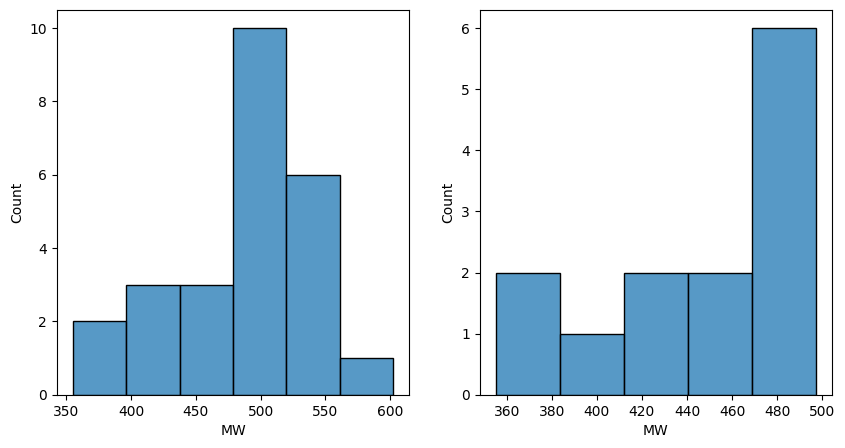

In [ ]:
fig,axs = plt.subplots(1,2, figsize = (10,5))

sns.histplot(tabla_CHEMBL674637['MW'], ax=axs[0])
sns.histplot(tabla_CHEMBL674637_druglike['MW'], ax=axs[1])

¡Ahora comparemos todas las características!

👇

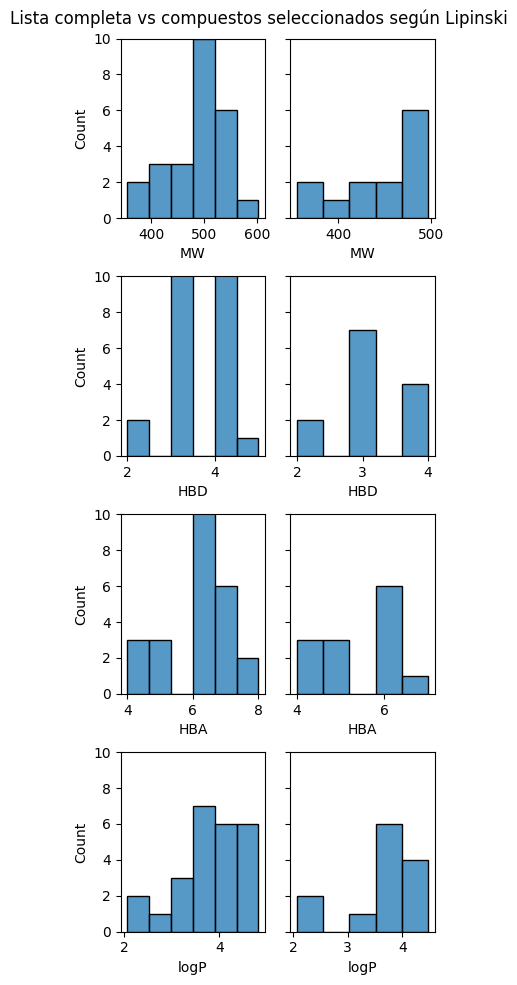

In [ ]:
fig,axs = plt.subplots(4,2, figsize = (4,10), sharey=True)

sns.histplot(tabla_CHEMBL674637['MW'], ax=axs[0,0])
sns.histplot(tabla_CHEMBL674637_druglike['MW'], ax=axs[0,1])
sns.histplot(tabla_CHEMBL674637['HBD'], ax=axs[1,0])
sns.histplot(tabla_CHEMBL674637_druglike['HBD'], ax=axs[1,1])
sns.histplot(tabla_CHEMBL674637['HBA'], ax=axs[2,0])
sns.histplot(tabla_CHEMBL674637_druglike['HBA'], ax=axs[2,1])
sns.histplot(tabla_CHEMBL674637['logP'], ax=axs[3,0])
sns.histplot(tabla_CHEMBL674637_druglike['logP'], ax=axs[3,1])

fig.suptitle("Tabla completa vs compuestos seleccionados según Lipinski")
fig.tight_layout()

plt.ylim(0, 10)
plt.savefig('sns_comparacion_histogramas.png')

💭 ¿Que cambios observas en los datos luego de la selección?

👇

### Actividad N°2 calculando propiedades fisicoquímicas de bibliotecas químicas

💭 Realizá el gráfico de la celda anterior pero para comparar tabla_CHEMBL674637 vs moleculas_aprobadas_por_FDA


Intenten hacer el histograma usando la frecuencia relativa en el eje y


👇

¿Hay moléculas de tabla_CHEMBL674637 que tengan propiedades dentro de los rangos de las moléculas aprobadas por la FDA?

### Actividad N°3 calculando propiedades fisicoquímicas de bibliotecas químicas
Realizá todos los pasos necesarios para seleccionar aquellos compuestos que cumplan con la Regla de los 3 de los datos del BioEnsayo ID CHEMBL674637 de ChEMBL.

👇

---
# Ejercicios Integradores

<center> <h3>¡Ahora te toca hacer el análisis a vos!</h3> </center>


## Actividad N°1:

Para este ejercicio vamos a usar la tabla del trabajo práctico N°2 ```'smiles.csv'```

Estas moléculas provenienen de un ensayo realizado en <i>T. cruzi</i>.

El objetivo de este experimento fue encontrar moléculas que tuvieran actividad tripanocida y asi obtener nuevos candidatos para tratar la enfermedad del Chagas. Se ensayaron ~300.000 compuestos químicos y ~4.000 resultaron activos

Si quieren profundizar, la descripción y el protocolo del ensayo se encuentran en este [link](https://pubchem.ncbi.nlm.nih.gov/bioassay/1885):
1.  Abrir la tabla ```'smiles.csv'``` del TP2
2.  Descargar de PubChem la tabla de datos de moléculas inactivas ([link](https://pubchem.ncbi.nlm.nih.gov/bioassay/1885))
3.  Realizar la limpieza de datos de la tabla de moléculas inactivas
4.  Calcular las propiedades fisicoquímicas de ambas tablas
5.  Agregar una columna a cada tabla que indique si las moléculas cumplen con las reglas de Lipinski
6.  Comparar la cantidad de moléculas que cumplen con este critero entre ambas tablas


❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

## Actividad N°2:

Veber (2002) define las siguientes reglas para evaluar la biodisponibilidad oral:

* tPSA por debajo de 140
* Número de enlaces rotables por debajo de 10

Usando las tablas de la actividad N°2:
1.   Agregar una columna a cada tabla que indique si las moléculas cumplen con las reglas de Veber
2.   Generar una tabla nueva que contenga todas las moléculas activas que cumplan con las reglas de Lipinski y de Veber

## Actividad N°3:
 Para esta actividad vamos a trabajar con las reglas de Ghose (1999), que  define las siguientes reglas para evaluar la semejanza con las drogas:

*  LogP entre 1.3 y 4.1
*  Peso molecular entre 230 y 390
*  Refractividad molar entre 70 y 110
*  Número de átomos entre 30 y 55

1.  Descargar de ChEMBL los datos de las moléculas que tengan un 50% de similitud con ```CC(=O)NC1=CC=C(C=C1)O```
2. Calcular las propiedades necesarias para determinar si cumple con el criterio de Ghose
3. Generar una columna que indique cuantas de las propiedades cumple cada molécula
4. Graficar en un histograma cuantas moléculas cumplen con ninguna, 1, 2, 3 o 4 de las características.




## Actividad N°4:

 Para esta actividad vamos a trabajar con las reglas de Muegge (2001), que  define las siguientes reglas para evaluar drug-likeness:

*  LogP entre -2 y 5
*  TPSA por debajo de 150
*  Número de anillos por debajo de 7
*  Número de átomos de carbono superior a 5
*  Número de heteroátomos: al menos 2
*  Número de enlaces rotables por debajo de 15
*  Número de aceptores H por debajo de 11
*  Número de donores H por debajo de 6
*  Peso molecular entre 200 y 600

1.   Descargar los datos de drogas usadas contra el Cáncer de Pulmón

Pista: ```new_client.drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")```
2.   Armar una tabla con los smiles de los datos
3.   Calcular las propiedades necesarias para determinar si cumple con el criterio de Muegge
4.   Agregar una columna para cada una de las reglas que indique "True" en el caso de que la molécula cumpla el criterio y "False" en el caso de que no lo haga.

In [ ]:
new_client.drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")

[{'drugind_id': 22637, 'efo_id': 'EFO:0003060', 'efo_term': 'non-small cell lung carcinoma', 'indication_refs': [{'ref_id': 'NCT02364609,NCT02438722,NCT04814056', 'ref_type': 'ClinicalTrials', 'ref_url': 'https://clinicaltrials.gov/ct2/results?id=%22NCT02364609%22OR%22NCT02438722%22OR%22NCT04814056%22'}, {'ref_id': 'fd638e5e-8032-e7ca-0179-95e96ab5d387', 'ref_type': 'DailyMed', 'ref_url': 'https://dailymed.nlm.nih.gov/dailymed/drugInfo.cfm?setid=fd638e5e-8032-e7ca-0179-95e96ab5d387'}], 'max_phase_for_ind': '4.0', 'mesh_heading': 'Carcinoma, Non-Small-Cell Lung', 'mesh_id': 'D002289', 'molecule_chembl_id': 'CHEMBL2105712', 'parent_molecule_chembl_id': 'CHEMBL1173655'}, {'drugind_id': 22696, 'efo_id': 'EFO:0003060', 'efo_term': 'non-small cell lung carcinoma', 'indication_refs': [{'ref_id': 'NCT02161991,NCT02646020', 'ref_type': 'ClinicalTrials', 'ref_url': 'https://clinicaltrials.gov/ct2/results?id=%22NCT02161991%22OR%22NCT02646020%22'}], 'max_phase_for_ind': '3.0', 'mesh_heading': 'Car

## Actividad N°5:

En esta sección vamos a trabajar con los datos de drogas aprobadas por la FDA. Los datos los pueden descargar accediendo a este [link](https://drive.google.com/file/d/1x-tgkBqvDYFvQdd1PsCghT9Umtyo76F_/view?usp=drive_link)

1.  Abrir los datos y generar una tabla
2.  Calcular sus propiedades fisicoquímicas
3.  Agregar una columna por cada criterio visto
*  Lipinski
*  Regla de los 3
*  PAINS
*  Brenk
*  Veber
*  Ghose
*  Muegge


4.  Para cada molécula, indique "True" en el caso de que la molécula cumpla con las reglas de cada criterio y "False" en el caso que no




# Bibliografía:

Esta guía está elaborada en base a https://www.rdkit.org/docs/GettingStartedInPython.html

*   "Lipinski's rule of five" de Christopher A. Lipinski

*    SwissADME: a free web tool to evaluate pharmacokinetics, drug-likeness and medicinal chemistry friendliness of small molecules. Sci. Rep. (2017) 7:42717.

*   RDKit: Open-source cheminformatics. https://www.rdkit.org

*   Prediction of Drug Absorption Using Multivariate Statistics. William J. Egan, Kenneth M. Merz,, and John J. Baldwin (2000). DOI: [10.1021/jm000292e.](https://doi.org/10.1021/jm000292e)
*   A Knowledge-Based Approach in Designing Combinatorial or Medicinal Chemistry Libraries for Drug Discovery. Arup K. Ghose, Vellarkad N. Viswanadhan, and John J. Wendoloski (1999). DOI [10.1021/cc9800071.](https://doi.org/10.1021/cc9800071)
* Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings. Lipinski CA, Lombardo F, Dominy BW, Feeney PJ (2001). DOI: [10.1016/s0169-409x(00)00129-0.](https://doi.org/10.1016/s0169-409x(00)00129-0)
* Simple Selection Criteria for Drug-like Chemical Matter. Ingo Muegge, Sarah L. Heald, and David Brittelli (2001). DOI: [10.1021/jm015507e.](https://doi.org/10.1021/jm015507e)
* Molecular Properties That Influence the Oral Bioavailability of Drug Candidates. Daniel F. Veber, Stephen R. Johnson, Hung-Yuan Cheng, Brian R. Smith, Keith W. Ward, and Kenneth D. Kopple (2002). DOI: [10.1021/jm020017n.](https://doi.org/10.1021/jm020017n)
* Lessons Learnt from Assembling Screening Libraries for Drug Discovery for Neglected Diseases. Ruth Brenk, Alessandro Schipani, Daniel James, Agata Krasowski, Ian Hugh Gilbert, Julie Frearson, Paul Graham Wyatt (2008). DOI: [10.1002/cmdc.200700139.](https://doi.org/10.1002/cmdc.200700139)
* New Substructure Filters for Removal of Pan Assay Interference Compounds (PAINS) from Screening Libraries and for Their Exclusion in Bioassays. Jonathan B. Baell and Georgina A. Holloway (2010). DOI: [10.1021/jm901137j.](https://doi.org/10.1021/jm901137j)
* Prediction of Drug Absorption Using Multivariate Statistics
William J. Egan, Kenneth M. Merz,, and John J. Baldwin (2000). DOI: [10.1021/jm000292e.](https://doi.org/10.1021/jm000292e)
